# The following Cells need to be executed to get and generate a dataset that has an aggregated count of bike trips per hundredth of an hour through the 24 hours in a day. I put all this here instead of providing you the dataset directly, so that you could learn something along the way :) The assignment is below.

In [1]:
!pip3 install seaborn

/bin/sh: pip3: command not found


## This cell automatically downloads Capital Bikeshare data

In [2]:
import sys
sys.path.append('..')
from utils.bikeshare import download_bikeshare_data

download_bikeshare_data(2016, 1, '../data/')

Downloading: 2016 Q1 | Extracting... | Created: ../data/2016-Q1-cabi-trip-history-data.csv


### And here we read in the data

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
bikes = pd.read_csv('../data/2016-Q1-cabi-trip-history-data.csv')
bikes.head()
bikes['start'] = pd.to_datetime(bikes['Start date'], infer_datetime_format=True)
bikes['end'] = pd.to_datetime(bikes['End date'], infer_datetime_format=True)

bikes.head()

,Duration (ms),Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member Type,start,end
0,301295,3/31/2016 23:59,4/1/2016 0:04,31280,11th & S St NW,31506,1st & Rhode Island Ave NW,W00022,Registered,2016-03-31 23:59:00,2016-04-01 00:04:00
1,557887,3/31/2016 23:59,4/1/2016 0:08,31275,New Hampshire Ave & 24th St NW,31114,18th St & Wyoming Ave NW,W01294,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
2,555944,3/31/2016 23:59,4/1/2016 0:08,31101,14th & V St NW,31221,18th & M St NW,W01416,Registered,2016-03-31 23:59:00,2016-04-01 00:08:00
3,766916,3/31/2016 23:57,4/1/2016 0:09,31226,34th St & Wisconsin Ave NW,31214,17th & Corcoran St NW,W01090,Registered,2016-03-31 23:57:00,2016-04-01 00:09:00
4,139656,3/31/2016 23:57,3/31/2016 23:59,31011,23rd & Crystal Dr,31009,27th & Crystal Dr,W21934,Registered,2016-03-31 23:57:00,2016-03-31 23:59:00


### Create a new column that represents the hour of the day 

In [5]:
bikes['hour_of_day'] = (bikes.start.dt.hour + (bikes.start.dt.minute/60).round(2))

### Aggregate to get a count per hour/minute of the day across all trips

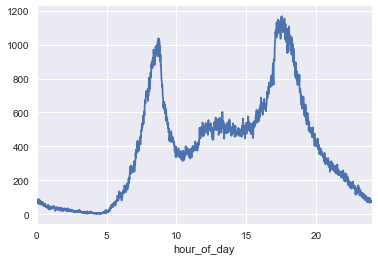

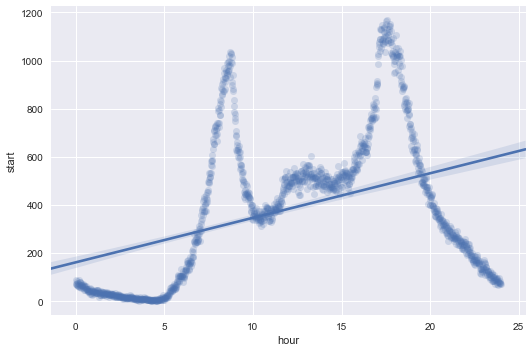

In [9]:
hours = bikes.groupby('hour_of_day').agg('count')
hours['hour'] = hours.index

hours.start.plot()

import seaborn as sns
sns.lmplot(x='hour', y='start', data=hours, aspect=1.5, scatter_kws={'alpha':0.2})

# Assignment 4 Cont'd
Using the `bikes` dataframe, create several (min 3) models with 
1. varying polynomial degrees 
2. different Ridge Regression `\alpha` (alpha) Ridge Coefficient values to you choosing. 
3. Explain the results in a paragraph and which model you'd recommend along with plots of all the predictions

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [156]:
x = hours[['hour']]
y = hours.start

### Basic Linear Regression

First way to run it

In [104]:
linear = linear_model.LinearRegression()
linear.fit(x, y)
linear.coef_, linear.intercept_

(array([ 18.51119838]), 161.63029612344491)

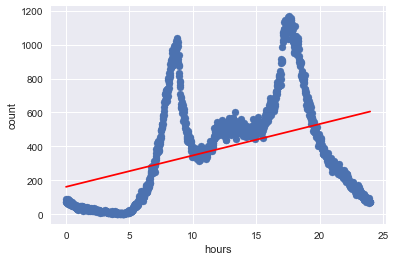

In [105]:
plt.scatter(x,y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='r')
plt.xlabel('hours')
plt.ylabel('count')

Second way to run it (the process below gives us the same regression, I just want both ways of calculating it documented here).

In [49]:
linreg = LinearRegression()
feature_cols = ['al']
linreg.fit(x, y)
linreg.coef_, linreg.intercept_

(array([ 18.51119838]), 161.63029612344491)

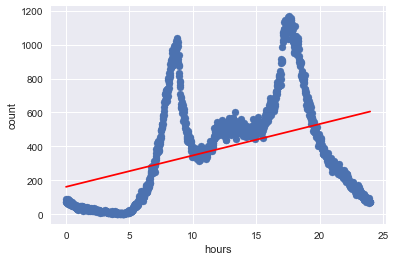

In [31]:
hours['pred'] = linreg.predict(x)

plt.scatter(hours.hour, hours.start)
plt.plot(hours.hour, hours.pred, color='red')
plt.xlabel('hours')
plt.ylabel('count')

### Linear "Ridge" Regression

#### alpha = 10

In [111]:
ridge = linear_model.Ridge(alpha=10)
ridge.fit(x, y)
ridge.coef_, ridge.intercept_

(array([ 18.50852064]), 161.66240669260193)

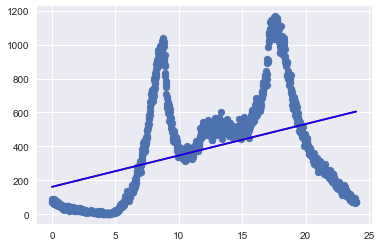

In [113]:
plt.scatter(x,y)
plt.plot(x, x*linreg.coef_ + linreg.intercept_, c='r')
plt.plot(x, x*ridge.coef_ + ridge.intercept_, c='b')

The ridge regression does not appear to differ too much from the basic linear regression. I'll try massively increasing the ridge coefficient.

#### alpha = 500

In [157]:
ridge = linear_model.Ridge(alpha=500)
ridge.fit(x, y)
ridge.coef_, ridge.intercept_

(array([ 18.37825369]), 163.22452452667616)

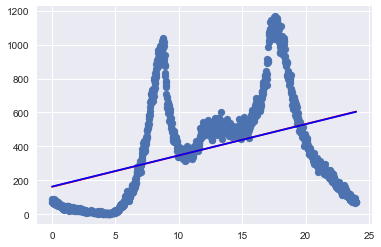

In [158]:
plt.scatter(x,y)
plt.plot(x, x*linreg.coef_ + linreg.intercept_, c='r')
plt.plot(x, x*ridge.coef_ + ridge.intercept_, c='b')

Even when we increase the value of the ridge coefficient to 500, the slope and intercept of the regression line remain almost identical to that of the basic linear regression.

### $x^{15}$ Polynomial

#### Linear Regression

In [160]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

poly = PolynomialFeatures(degree=15)
x_15 = poly.fit_transform(x)

In [127]:
linear = linear_model.LinearRegression()
linear.fit(x_15, y)
(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,  -1.54726584e-05,   8.29017265e-08,
          9.15236182e-07,   5.81292522e-06,   3.23939800e-05,
          1.50403317e-04,   5.19117329e-04,   9.68147501e-04,
         -3.93851462e-04,   6.31176307e-05,  -5.47387368e-06,
          2.80561422e-07,  -8.53289919e-09,   1.42879374e-10,
         -1.01744516e-12]), 27.904439703623439)

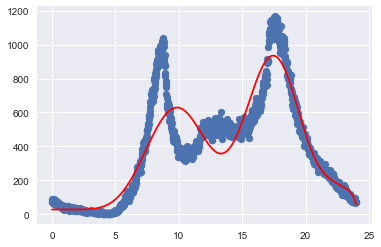

In [128]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='r')

I like the fit of the $x^{15}$ polynomial regression. It doesn't fit the values perfectly, but it shows the clear peaks in the morning and evening, and gets close to zero in the middle of the night.

#### Ridge Regression

In [161]:
ridge = linear_model.Ridge(alpha=10)
ridge.fit(x_15, y)
(ridge.coef_, ridge.intercept_)

(array([  0.00000000e+00,  -3.47573680e-02,   1.35610332e+01,
         -2.18579058e+01,   1.53787747e+02,  -1.35225292e+02,
          5.40199761e+01,  -1.25452322e+01,   1.87780617e+00,
         -1.90632555e-01,   1.34308295e-02,  -6.58434273e-04,
          2.20630563e-05,  -4.82237056e-07,   6.19895120e-09,
         -3.55596020e-11]), 13850.601017252604)

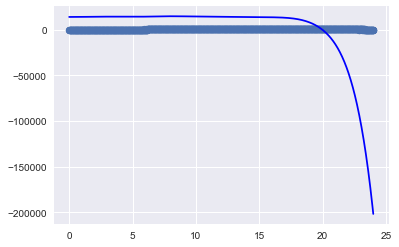

In [162]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, ridge.coef_) + ridge.intercept_, c='b')

It doesn't seem like the ridge regression fits the data at all when using polynomials. I'm going to stick to basic linear regressions for the other polynomials below.

### $x^{2}$ Polynomial

In [131]:
poly_2 = PolynomialFeatures(degree=2)
x_2 = poly_2.fit_transform(x)

linear = linear_model.LinearRegression()
linear.fit(x_2, y)
(linear.coef_, linear.intercept_)

(array([   0.        ,  120.27638582,   -4.24316279]), -244.86521667900467)

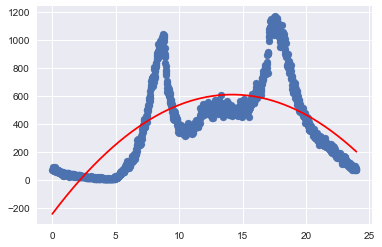

In [132]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_2, linear.coef_) + linear.intercept_, c='r')

An $x^2$ polynomial obviously won't be able to fit the multiple peaks and valleys of our data. The regression line shows an increase in activity during the day and a dip at night, but doesn't accurately predict the morning and evening booms.

### $x^{8}$ Polynomial

In [167]:
poly_8 = PolynomialFeatures(degree=8)
x_8 = poly_8.fit_transform(x)

linear = linear_model.LinearRegression()
linear.fit(x_8, y)
(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,   8.68065727e+02,  -7.13098618e+02,
          2.25824855e+02,  -3.45898631e+01,   2.86193212e+00,
         -1.30905986e-01,   3.11403766e-03,  -3.00691958e-05]),
 -185.61582931864154)

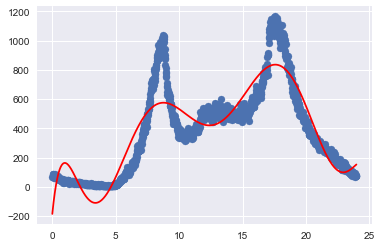

In [168]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_8, linear.coef_) + linear.intercept_, c='r')

The $x^8$ polynomial regression fits the data much better than $x^2$, but still doesn't fit very well, especially at the very beginning.

### $x^{12}$ Polynomial

In [165]:
poly_12 = PolynomialFeatures(degree=12)
x_12 = poly_12.fit_transform(x)

linear = linear_model.LinearRegression()
linear.fit(x_12, y)
(linear.coef_, linear.intercept_)

(array([  0.00000000e+00,  -5.93213367e-01,  -1.91616533e+00,
         -4.19933910e+00,  -4.51758732e+00,   3.12057309e+00,
         -7.05240599e-01,   8.19012747e-02,  -5.54615464e-03,
          2.27369993e-04,  -5.54589933e-06,   7.37892909e-08,
         -4.10247170e-10]), 78.494956777725974)

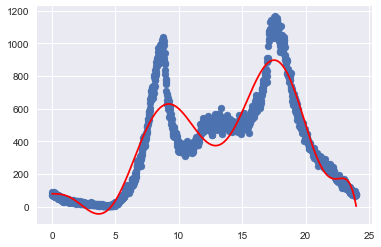

In [166]:
plt.scatter(x,y)
plt.plot(x, np.dot(x_12, linear.coef_) + linear.intercept_, c='r')

The $x^{12}$ polynomial gets much closer to fitting the data, but the tails on each end are a little off.

## Subset casual vs. registered users

Just for interest's sake, I made a subset of "casual" vs. "registered" riders to see if the patterns were different. As you can see, the number of registered riders at any given time closely mirror the overall pattern, largely because there are far more registered riders than casual riders. Casual riders differ from registered riders in that they do not have peak times in the morning and evening, which I expect is because they use the bikes for commuting far less than the registered riders.

In [121]:
casual = bikes['Member Type']=="Casual"
registered = bikes['Member Type']=="Registered"
casual = bikes[casual]
registered = bikes[registered]

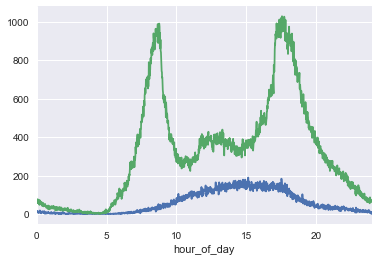

In [147]:
casual_hours = casual.groupby('hour_of_day').agg('count')
casual_hours['hour'] = casual_hours.index
registered_hours = registered.groupby('hour_of_day').agg('count')
registered_hours['hour'] = registered_hours.index

casual_hours.start.plot()
registered_hours.start.plot()

### Casual users

#### Linear regression

In [139]:
x = casual_hours[['hour']]
y = casual_hours.start

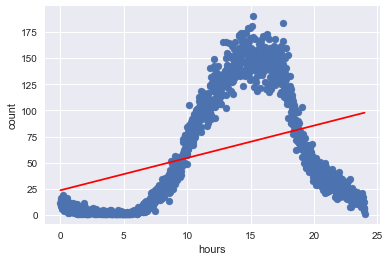

In [140]:
linear = linear_model.LinearRegression()
linear.fit(x, y)
linear.coef_, linear.intercept_
plt.scatter(x,y)
plt.plot(x, x*linear.coef_ + linear.intercept_, c='r')
plt.xlabel('hours')
plt.ylabel('count')

#### $x^{8}$ Polynomial

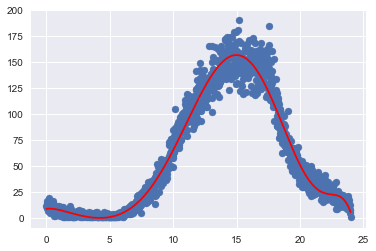

In [146]:
poly_8 = PolynomialFeatures(degree=8)
x_8 = poly_8.fit_transform(x)

linear = linear_model.LinearRegression()
linear.fit(x_8, y)
(linear.coef_, linear.intercept_)

plt.scatter(x,y)
plt.plot(x, np.dot(x_8, linear.coef_) + linear.intercept_, c='r')

## Results

Overall, the basic linear regression models fit the data better than ridge regression models. The ridge regression model is incredibly similar to the regular linear regression model in first-degree models, even with large ridge coefficients. However, when we increase the number of degrees and use polynomials, the ridge regression models do not fit the data at all.

After assessing models with various polynomial degrees, I would recommend using the $x^{15}$ model. It fits the data best on the tails (the night hours) and captures the peaks of use in the morning and evening. The first-degree model does not sufficiently capture the variety of the data throughout the day, and neither does the second-degree model. As the degrees increase, the fit gets better, until we reach the $x^{15}$ model. And also, while the model fits the data well, it does not hug the values so closely that it fails to accurately predict future values.

### $x^{15}$ Polynomial

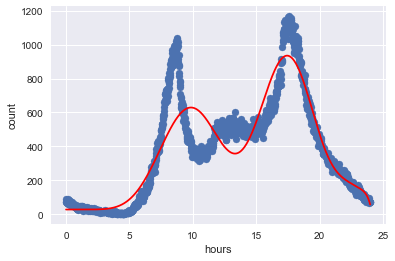

In [170]:
x = hours[['hour']]
y = hours.start
poly = PolynomialFeatures(degree=15)
x_15 = poly.fit_transform(x)
linear = linear_model.LinearRegression()
linear.fit(x_15, y)
plt.scatter(x,y)
plt.plot(x, np.dot(x_15, linear.coef_) + linear.intercept_, c='r')
plt.xlabel('hours')
plt.ylabel('count')